<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2012%3A%20CRM%20%26%20Marketing%20Analytics/12_4_Social_Media_and_Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CRM & Marketing Analytics**
## Social Media and Web

In [ ]:
#Import required libraries

import pandas as pd # for data structure and analysis
import numpy as np 
import seaborn as sns # For visualization
import matplotlib # for plotting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random


In [ ]:
# Import Data

url="https://drive.google.com/file/d/1lD3LYmpon6ZNR_cM0ZKHYKBf56wblDYQ/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = np.loadtxt(path, delimiter=',', skiprows=1, dtype=str)
print(data)


['1001;P1;1' '1002;P1;2' '1003;P1;2' ... '3998;P8;3' '3999;P8;7'
 '4000;P8;3']


In [ ]:
df = pd.DataFrame(data)
df.head()

,0
0,1001;P1;1
1,1002;P1;2
2,1003;P1;2
3,1004;P1;5
4,1005;P1;4


In [ ]:
df[['CustomerID','CategoryID','Visits']] = df[0].str.split(";",expand=True,) # expanding data to columns
df = df.drop(0, axis=1) # Unnecessary column is deleted. 
df = df.drop_duplicates(subset=None, keep='first') # Eliminating the duplicates
df.head()

,CustomerID,CategoryID,Visits
0,1001,P1,1
1,1002,P1,2
2,1003,P1,2
3,1004,P1,5
4,1005,P1,4


In [ ]:
#The table is pivotted by CategoryID
df = df.pivot_table(index='CustomerID', columns='CategoryID', values='Visits', aggfunc=np.sum)
print(df) 

CategoryID   P1 P10  P2  P3  P4  P5  P6 P7  P8 P9
CustomerID                                       
1000        NaN   5   1   5   4   2   4  9  13  2
1001          1   4   1   2   3   5   4  8  10  1
1002          2   4   2   3   1   1   3  9   7  4
1003          2   2   2   5   8  14  12  2   1  5
1004          5   1   2   3  15   8  14  5   4  3
...         ...  ..  ..  ..  ..  ..  .. ..  .. ..
3996          7   4   8  10   5   2   2  1   3  5
3997         15   3  10  13   5   1   1  4   2  5
3998          2   2   5   4  15   8   7  4   3  3
3999          2   1   2   3   5   5   3  7   7  3
4000         14   5  11  11   4   3   4  3   3  2

[3001 rows x 10 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 1000 to 4000
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   P1      3000 non-null   object
 1   P10     3001 non-null   object
 2   P2      3001 non-null   object
 3   P3      3001 non-null   object
 4   P4      3001 non-null   object
 5   P5      3001 non-null   object
 6   P6      3001 non-null   object
 7   P7      3001 non-null   object
 8   P8      3001 non-null   object
 9   P9      3001 non-null   object
dtypes: object(10)
memory usage: 257.9+ KB


In [ ]:
df.describe()

CategoryID,P1,P10,P2,P3,P4,P5,P6,P7,P8,P9
count,3000,3001,3001,3001,3001,3001,3001,3001,3001,3001
unique,14,14,14,14,14,14,14,14,14,14
top,5,4,2,2,4,3,4,3,1,2
freq,460,489,492,486,464,460,483,477,468,480


In [ ]:
df=df.fillna(0) #replace the NaN values with 0 
df = df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']] # Ordering the columns
df.head()

CategoryID,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
CustomerID,,,,,,,,,,
1000,0,1,5,4,2,4,9,13,2,5
1001,1,1,2,3,5,4,8,10,1,4
1002,2,2,3,1,1,3,9,7,4,4
1003,2,2,5,8,14,12,2,1,5,2
1004,5,2,3,15,8,14,5,4,3,1


The P1, P2, ... columns are product groups. 
> In the original data, one can observe that each of the product groups belongs to a category. In detail, 
> P1: Bakery (Category 2), 
> P2: Baverage (Category 3), 
> P3: Snack (Category 9),
> P4: Food (Category 5), 
> P5: Fruit & Vagetables (Category 6), 
> P6: Clean-up (Category 4), 
> P7: Home & Living (Category 7), 
> P8: Technology (Category 10), 
> P9: Baby Care (Category 1) and 
> P10: Ready to Eat (Category 8). 

In [ ]:
# Change the column names according to real data: 'C' stands for Category. 
df=df.rename(columns={'P1':'C2', 'P2':'C3', 'P3':'C9', 'P4':'C5', 'P5':'C6', 'P6':'C4', 'P7':'C7', 'P8':'C10', 'P9':'C1', 'P10':'C8'})
df.columns.name='Category'

In [ ]:
# Ordering the columns 
df = df[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']]
df.head()

Category,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
CustomerID,,,,,,,,,,
1000,2,0,1,4,4,2,9,5,5,13
1001,1,1,1,4,3,5,8,4,2,10
1002,4,2,2,3,1,1,9,4,3,7
1003,5,2,2,12,8,14,2,2,5,1
1004,3,5,2,14,15,8,5,1,3,4


In [ ]:
df_prep= df.reset_index() # Preperation for K-Means application; df_prep dataframe is created for this.
df_prep= df_prep.drop("CustomerID",axis=1)
df_prep.head()

Category,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,2,0,1,4,4,2,9,5,5,13
1,1,1,1,4,3,5,8,4,2,10
2,4,2,2,3,1,1,9,4,3,7
3,5,2,2,12,8,14,2,2,5,1
4,3,5,2,14,15,8,5,1,3,4


In [ ]:
from sklearn.preprocessing import StandardScaler # Here, the values are scaled in order to avoid bias arising from the high differences. 
scaler = StandardScaler()

scaler.fit(df_prep)

df_prep = scaler.transform(df_prep)
df_prep= pd.DataFrame(df_prep)
df_prep.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.764181,-1.285297,-1.022605,-0.274941,-0.269624,-0.771616,1.022699,0.022224,0.001779,2.060170
1,-1.028174,-1.030933,-1.022605,-0.274941,-0.527888,0.007005,0.765050,-0.235279,-0.760982,1.289692
2,-0.236195,-0.776569,-0.768898,-0.538382,-1.044417,-1.031157,1.022699,-0.235279,-0.506728,0.519214
3,0.027798,-0.776569,-0.768898,1.832589,0.763433,2.342870,-0.780847,-0.750285,0.001779,-1.021741
4,-0.500188,-0.013477,-0.768898,2.359471,2.571283,0.785627,-0.007899,-1.007788,-0.506728,-0.251263


In [ ]:
from sklearn.cluster import KMeans # Importing tools for K-means algorithm from the library
from sklearn.metrics import silhouette_score

In [ ]:
random.seed(12345)
range_n_clusters = list (range(2,17))
score_list = [] # Create a list for keeping the values of silhouette score
for n_clusters in range_n_clusters:    
    clusterer = KMeans(n_clusters=n_clusters)
    predictions = clusterer.fit_predict(df_prep)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score (df_prep, predictions, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    score_list.append(score)

For n_clusters = 2, silhouette score is 0.3305417373804981)
For n_clusters = 3, silhouette score is 0.4584689273949073)
For n_clusters = 4, silhouette score is 0.5697283919979704)
For n_clusters = 5, silhouette score is 0.45217562954907387)
For n_clusters = 6, silhouette score is 0.3468331826465769)
For n_clusters = 7, silhouette score is 0.244244716736008)
For n_clusters = 8, silhouette score is 0.1503528122359757)
For n_clusters = 9, silhouette score is 0.1449872749789383)
For n_clusters = 10, silhouette score is 0.1440622116673035)
For n_clusters = 11, silhouette score is 0.1401180837668965)
For n_clusters = 12, silhouette score is 0.13451813251747724)
For n_clusters = 13, silhouette score is 0.13932910403760293)
For n_clusters = 14, silhouette score is 0.13536284927064293)
For n_clusters = 15, silhouette score is 0.1377547903890657)
For n_clusters = 16, silhouette score is 0.13518859764145819)


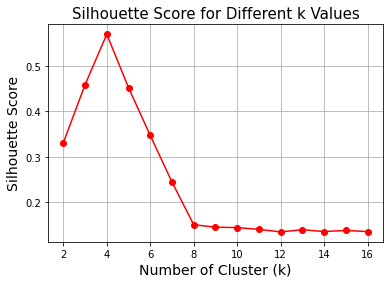

In [ ]:
sscore = {'n_cluster': range_n_clusters,
        'Silhouette_score': score_list }

sscore_df = pd.DataFrame(sscore,columns=['n_cluster','Silhouette_score'])
  
plt.plot(sscore_df['n_cluster'], sscore_df['Silhouette_score'], color='red', marker='o')
plt.title('Silhouette Score for Different k Values', fontsize=15)
plt.xlabel('Number of Cluster (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid(True)
plt.show()

Now, try with n= 4 since it has maximum score value. 

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_prep)
kmeans.cluster_centers_
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-0.49145798, -0.52388701, -0.54136738, -0.53141285, -0.50226702,
        -0.53301755,  1.54106559, -0.50913162, -0.52858841,  1.53055132],
       [-0.5036615 , -0.51852312, -0.5262075 ,  1.52269867,  1.52701197,
         1.52736633, -0.51980748, -0.49142695, -0.52947699, -0.5249855 ],
       [-0.49709424,  1.51866858,  1.52206085, -0.49173115, -0.52956989,
        -0.52660735, -0.51548154, -0.49747629,  1.52034844, -0.52179982],
       [ 1.58450954, -0.52468803, -0.50174518, -0.52699213, -0.52176506,
        -0.49289079, -0.52176023,  1.59058546, -0.50991945, -0.49841779]])

In [ ]:
#SCALED CENTROID TABLE
#The order of four Clusters (0,1,2,3) can be changed for every single run due to the running process of the K-Means algorithm. 
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids,columns= ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])
centroids #These are the centroids of clusters for k=4.

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,-0.491458,-0.523887,-0.541367,-0.531413,-0.502267,-0.533018,1.541066,-0.509132,-0.528588,1.530551
1,-0.503661,-0.518523,-0.526208,1.522699,1.527012,1.527366,-0.519807,-0.491427,-0.529477,-0.524986
2,-0.497094,1.518669,1.522061,-0.491731,-0.529570,-0.526607,-0.515482,-0.497476,1.520348,-0.521800
3,1.584510,-0.524688,-0.501745,-0.526992,-0.521765,-0.492891,-0.521760,1.590585,-0.509919,-0.498418


In [ ]:
#CENTROID TABLE
#Reversing to original values for centroids
centroids_reversed = StandardScaler().fit(df.reset_index().drop("CustomerID",axis=1)).inverse_transform(centroids, copy=None)
centroids_reversed = pd.DataFrame(centroids_reversed,columns= ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])
centroids_reversed

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,3.033069,2.993386,2.896825,3.026455,3.099206,2.919312,11.011905,2.936508,2.914021,10.937831
1,2.986842,3.014474,2.956579,10.823684,10.956579,10.857895,3.013158,3.005263,2.910526,2.934211
2,3.011719,11.023438,11.029948,3.177083,2.993490,2.944010,3.029948,2.981771,10.972656,2.946615
3,10.896792,2.990237,3.052999,3.043236,3.023710,3.073919,3.005579,11.090656,2.987448,3.037657


In [ ]:
df_with_clusters = df
df_with_clusters['Clusters'] = kmeans.labels_
df_with_clusters= df_with_clusters.reset_index()
df_with_clusters = df_with_clusters.set_index("Clusters")
df_with_clusters = df_with_clusters.sort_index()

df_with_clusters

Category,CustomerID,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
Clusters,,,,,,,,,,,
0,1000,2,0,1,4,4,2,9,5,5,13
0,2475,4,2,1,4,1,1,10,3,5,7
0,2473,3,1,5,2,4,2,15,3,5,7
0,2472,1,1,4,4,2,2,8,1,4,15
0,2458,1,1,4,2,5,3,12,3,2,7
...,...,...,...,...,...,...,...,...,...,...,...
3,1340,14,5,3,3,5,3,3,8,2,3
3,3480,12,1,5,5,2,4,5,8,2,5
3,2158,9,2,3,3,4,3,5,10,4,2


In [ ]:
df_with_clusters.describe()

Category,CustomerID,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
count,3001,3001,3001,3001,3001,3001,3001,3001,3001,3001,3001
unique,3001,14,15,14,14,14,14,14,14,14,14
top,3001,2,5,2,4,4,3,3,4,2,1
freq,1,480,460,492,483,464,460,477,489,486,468


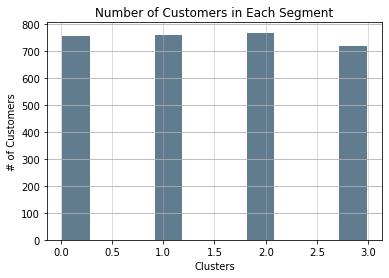

In [ ]:
df_with_clusters.reset_index()["Clusters"].plot.hist(grid=True, bins=10, rwidth=0.9, #Check for distribution of clusters by a histogram and prepare a complete plot
                   color='#607c8e')
plt.title('Number of Customers in Each Segment')
plt.xlabel('Clusters')
plt.ylabel('# of Customers')
plt.grid(axis='x', alpha=0.55)

According to the centroid table, the customers in Cluster 1 are interested in Category 7 (Home&Living) and Category 10 (Technology). It can directly be seen from Table 5 as the numbers associated with Category 7 and Category 10 is more than 10. In Table 6, the same values around 1.5 are observed which means the page visits are higher than the mean.  Similarly, it can be observed that customers in Cluster 2 are related to Category 4  (Clean-Up), Category 5 (Food), and Category 6 (Fruit and Vegetables). The customers in Cluster 3 are related to Category 2 (Bakery), Category 3 (Beverage), and category 9. Finally, Cluster 4 is related to Category 1 (Baby Care) and Category 8 (Ready to Eat). 

From these results, customers in **Cluster 1** can be profiled as **HomeTech** group which cares about technology and their life at home. **Cluster 2** can be defined as **Everyday User**, which nearly buys all of the daily needs from the system. **Cluster 3** can be defined as **FastFooders** since their focus is on the product which is ready to consume quickly. And finally, **Cluster 4** can be defined as **BigFamily**, which refers to couples with babies.
